Import Libraries


In [397]:
import numpy as np
import pandas  as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.model_selection import cross_val_score

Data Collection


In [345]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_sumbmision = pd.read_csv("gender_submission.csv") # y 
whole_test = pd.merge(test, test_sumbmision, on="PassengerId",how="inner")

In [346]:
train = pd.concat([train,whole_test])

In [347]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB



Exploratory Data Analysis


In [349]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [350]:
train.PassengerId = train.PassengerId.astype("object")
train.Survived = train.Survived.astype("object")
train.Pclass = train.Pclass.astype("object")

In [351]:
categorical = [col for col in train.columns if train[col].dtype=="object"]
categorical

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Ticket',
 'Cabin',
 'Embarked']

In [352]:
numerical = [col for col in train.columns if train[col].dtype!="object"]
numerical

['Age', 'SibSp', 'Parch', 'Fare']

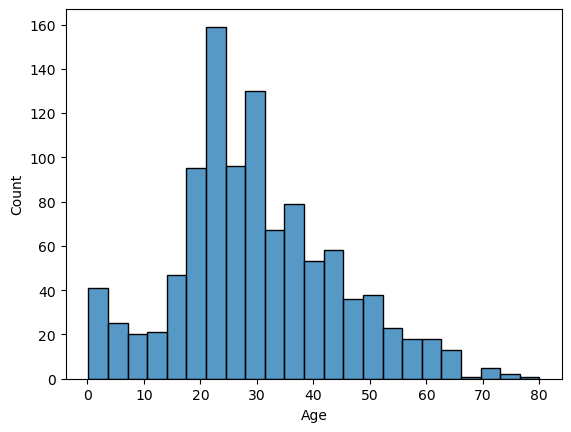

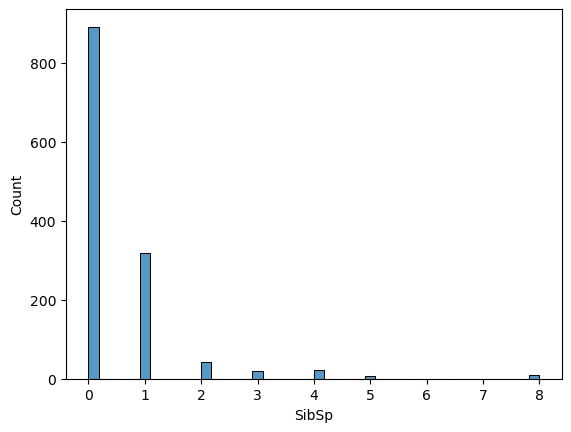

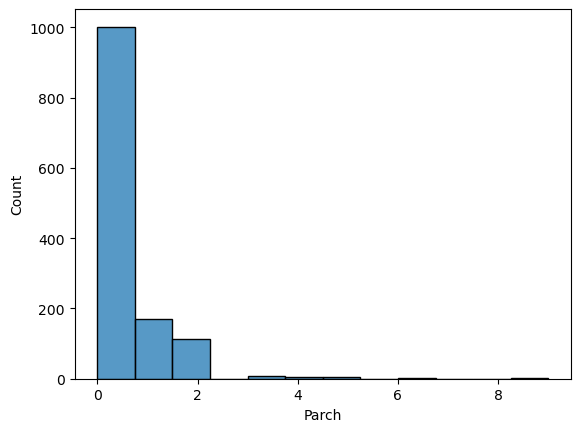

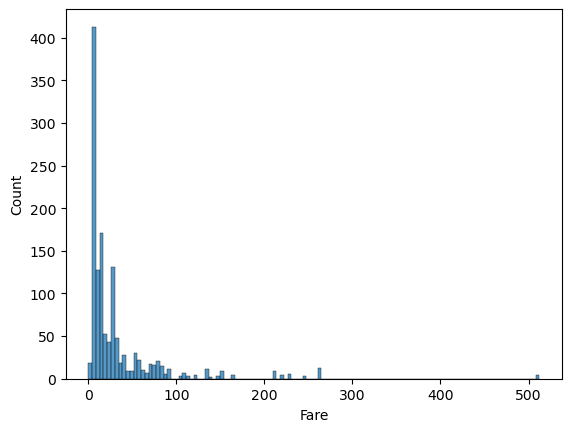

In [353]:
for i in numerical:
    sns.histplot(train[i])
    plt.show()

Correlation

<Axes: >

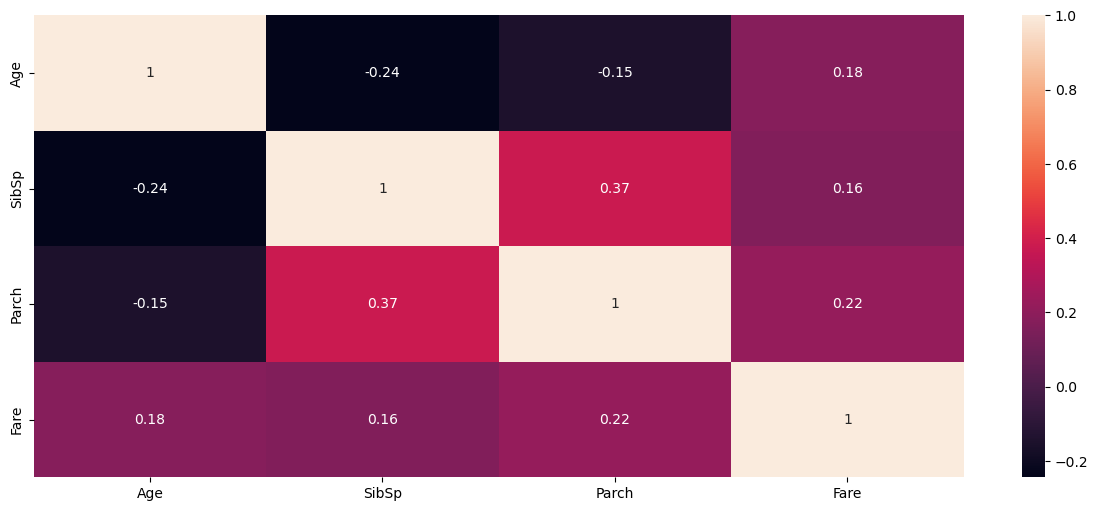

In [354]:
plt.figure(figsize=(15,6))
sns.heatmap(train[numerical].corr(),annot = True)

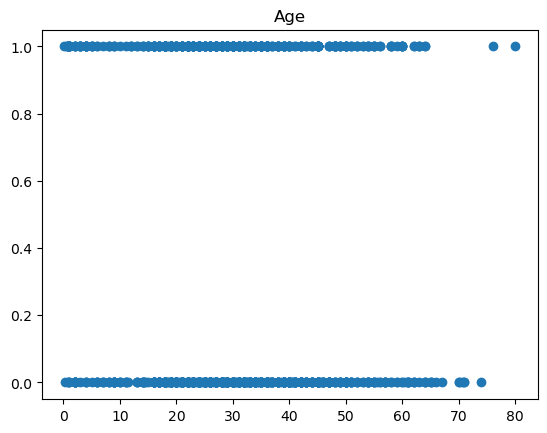

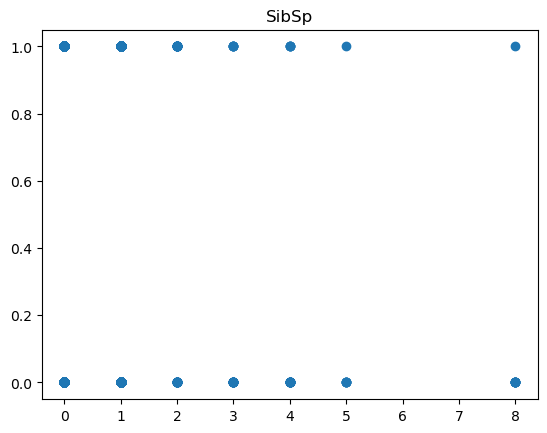

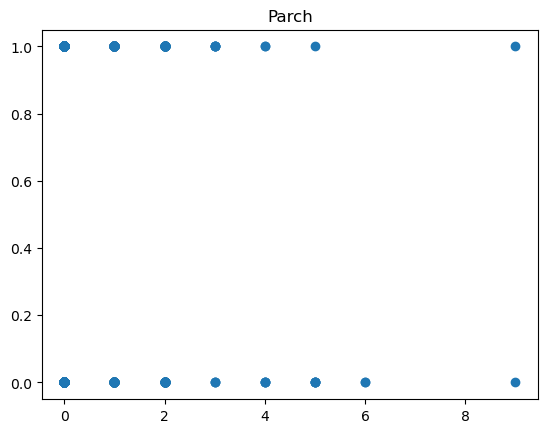

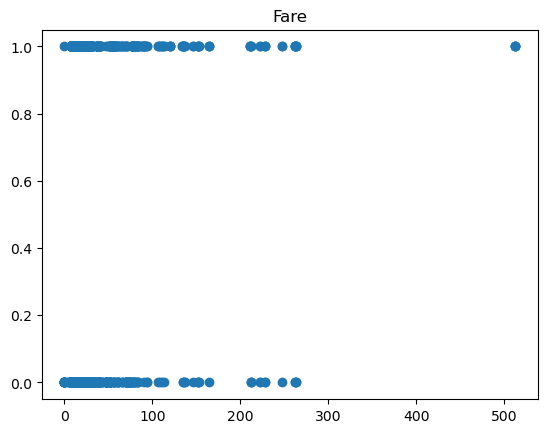

In [355]:
for i in numerical:
    plt.scatter(train[i] ,train.Survived.astype("int32"))
    plt.title(i)
    plt.show()


In [356]:
pd.pivot_table(train , index="Survived",values = numerical)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.510986,23.879124,0.311656,0.496933
1,28.931079,48.811497,0.506073,0.502024


Show Categorical Data 

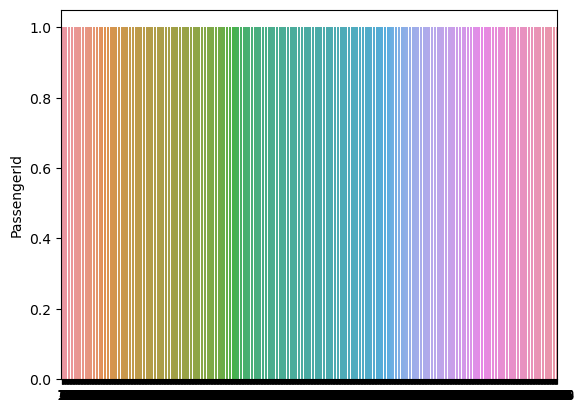

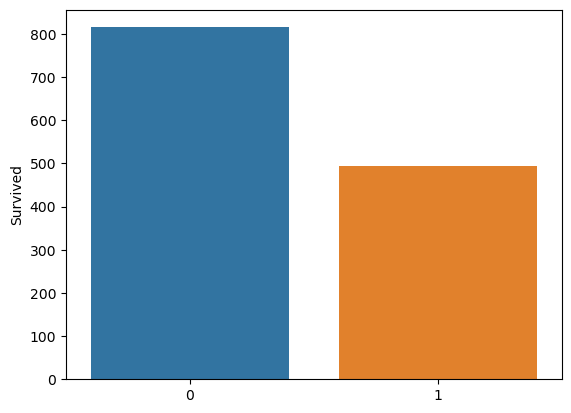

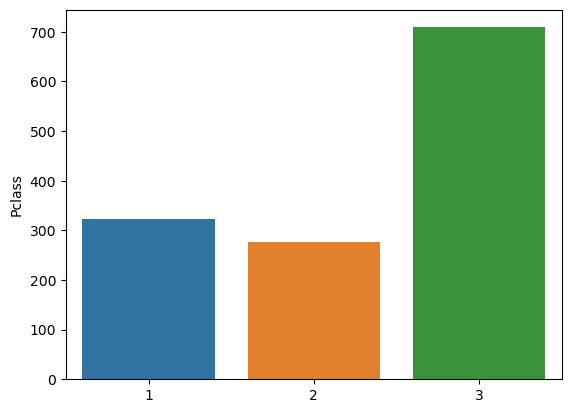

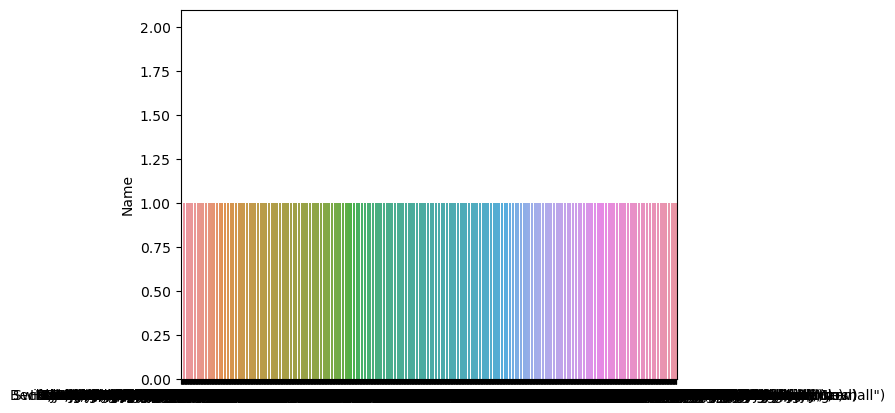

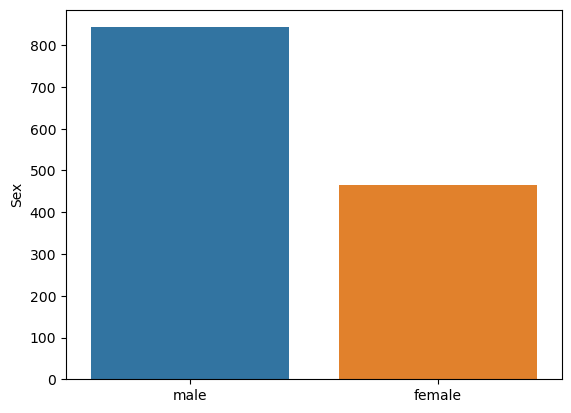

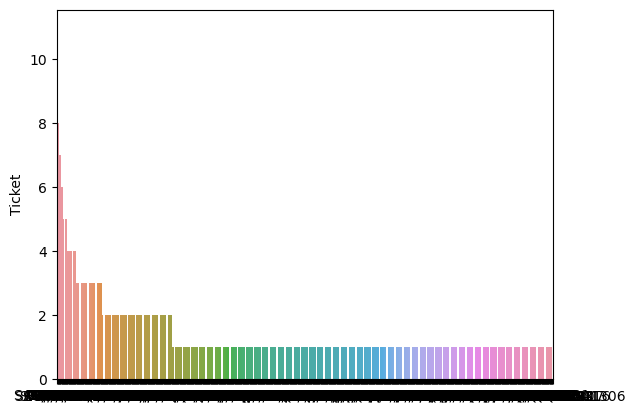

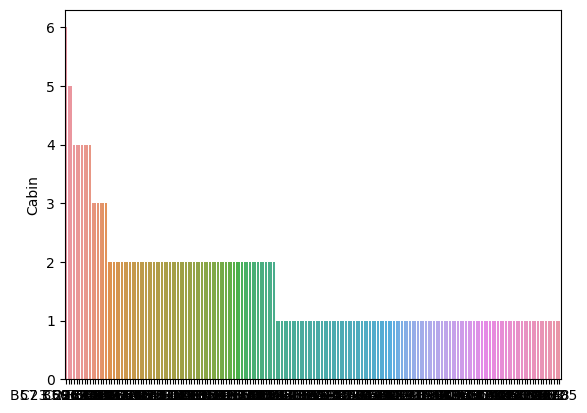

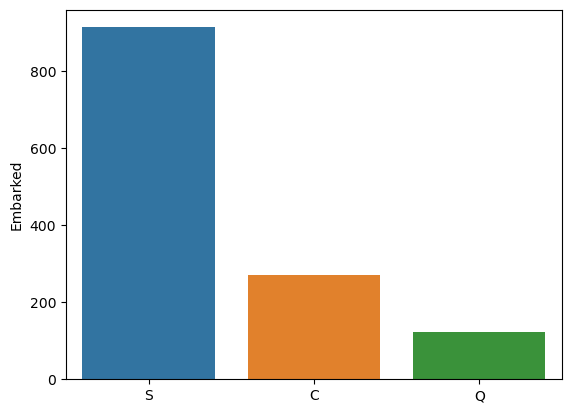

In [357]:
for i  in categorical:
    sns.barplot(data  = train ,x = train[i].value_counts().index , y = train[i].value_counts())
    plt.show()

In [358]:
categorical.remove("Survived")
categorical.remove("PassengerId")
categorical.remove("Name")
categorical.remove("Ticket")
categorical.remove("Cabin")

In [359]:
categorical

['Pclass', 'Sex', 'Embarked']

In [360]:
# show the relation between categorical data and y 
for i in categorical :
    data_group = train.groupby(i).Survived.agg(["mean"])
    display(data_group)

,mean
Pclass,
1,0.575851
2,0.422383
3,0.269394


,mean
Sex,
female,0.82618
male,0.12930


,mean
Embarked,
C,0.492593
Q,0.439024
S,0.333698


Feature Engineering


In [361]:
cabin = train.Cabin

In [362]:
# Nan >> 0 , split according to space ... 1 >> one cabin ... 2>> tow cabins and so on 
def multiple_cabins (x):

    if pd.isna(x):
        return 0
    else :
        return len(x.split(" "))

If multiple cabins have an effect on Surviving ?


In [363]:
train["multiple_cabin"] = train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(" ")))
train.multiple_cabin

0      0
1      1
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: multiple_cabin, Length: 1309, dtype: int64

In [364]:
train.multiple_cabin.value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: multiple_cabin, dtype: int64

In [365]:
data_group = train.groupby("multiple_cabin").Survived.agg(["mean"])
display(data_group)

,mean
multiple_cabin,
0,0.309665
1,0.622047
2,0.500000
3,0.600000
4,0.600000


In [366]:
train["cabin_class"] = train.Cabin.apply(lambda x: str(x)[0])   # split according to the first char

In [367]:
train.cabin_class.value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_class, dtype: int64

If cabin class have an effect on Surviving ?


In [368]:
data_group = train.groupby("cabin_class").Survived.agg(["mean"])
display(data_group)

,mean
cabin_class,
A,0.454545
B,0.676923
C,0.574468
D,0.652174
E,0.682927
F,0.523810
G,0.600000
T,0.000000
n,0.309665


In [369]:
ticket = train.Ticket

In [370]:
train ["numerical_ticket"] = train.Ticket.apply(lambda x : 1 if x.isnumeric() else 0 )
train.numerical_ticket.value_counts()

1    957
0    352
Name: numerical_ticket, dtype: int64

If Numerical_ticket has an effect on Surviving ?


In [371]:
data_group = train.groupby("numerical_ticket").Survived.agg(["mean"])
display(data_group)
#----------------------------------------------------
# (0,1) have the same mean >> there is no effect (drop Ticket)

,mean
numerical_ticket,
0,0.389205
1,0.373041


In [372]:
name = train.Name

In [373]:
train["name_title"] = train.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [374]:
train.name_title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: name_title, dtype: int64

If name_title has an effect on Surviving ?


In [375]:
data_group = train.groupby("name_title").Survived.agg(["mean"])
display(data_group)

,mean
name_title,
Capt,0.000000
Col,0.250000
Don,0.000000
Dona,1.000000
Dr,0.375000
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.377049


Data Preprocessing 

In [376]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   object 
 1   Survived          1309 non-null   object 
 2   Pclass            1309 non-null   object 
 3   Name              1309 non-null   object 
 4   Sex               1309 non-null   object 
 5   Age               1046 non-null   float64
 6   SibSp             1309 non-null   int64  
 7   Parch             1309 non-null   int64  
 8   Ticket            1309 non-null   object 
 9   Fare              1308 non-null   float64
 10  Cabin             295 non-null    object 
 11  Embarked          1307 non-null   object 
 12  multiple_cabin    1309 non-null   int64  
 13  cabin_class       1309 non-null   object 
 14  numerical_ticket  1309 non-null   int64  
 15  name_title        1309 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory 

Check Null Values 

In [377]:
train.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  263
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin               1014
Embarked               2
multiple_cabin         0
cabin_class            0
numerical_ticket       0
name_title             0
dtype: int64

Fill Null Values in Age with Mean 

In [378]:
train.Age.fillna(train.Age.mean(), inplace = True)

In [379]:
train.dropna(subset=["Embarked","Fare"],inplace = True)


Drop Unnecessary Features 


In [380]:
train.drop(["PassengerId","Name","Ticket","Cabin","numerical_ticket"], axis = 1,inplace=True)

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        1306 non-null   object 
 1   Pclass          1306 non-null   object 
 2   Sex             1306 non-null   object 
 3   Age             1306 non-null   float64
 4   SibSp           1306 non-null   int64  
 5   Parch           1306 non-null   int64  
 6   Fare            1306 non-null   float64
 7   Embarked        1306 non-null   object 
 8   multiple_cabin  1306 non-null   int64  
 9   cabin_class     1306 non-null   object 
 10  name_title      1306 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 122.4+ KB


Redistribution Parch to the normal distribution to prevent the model from being biased

In [382]:
train["norm_Parch"] = np.log(train.Parch+.000001)

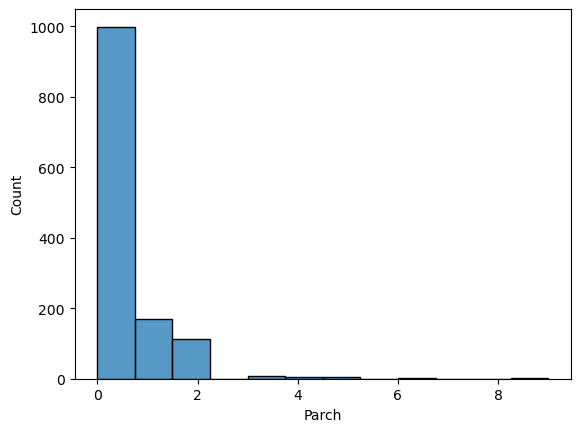

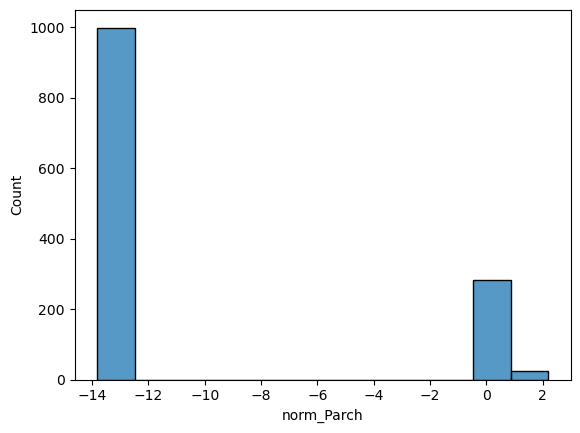

In [383]:
sns.histplot(train.Parch)
plt.show()
sns.histplot(train.norm_Parch)
plt.show()

Redistribution Fare to the normal distribution to prevent the model from being biased

In [384]:
train["norm_Fare"] = np.log(train.Fare+.000001)

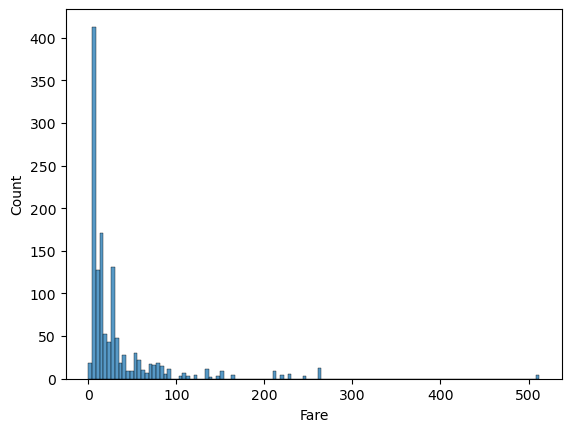

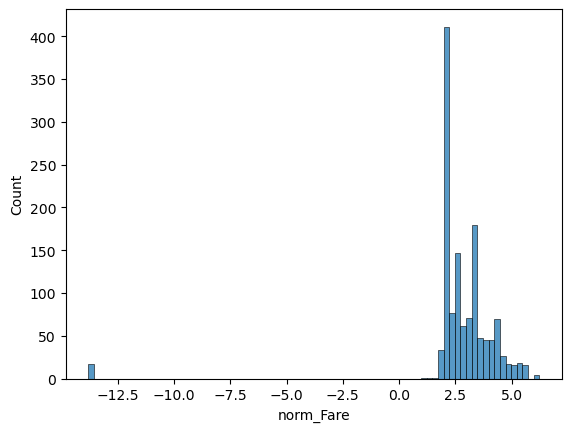

In [385]:
sns.histplot(train.Fare)
plt.show()
sns.histplot(train.norm_Fare)
plt.show()

Redistribution SibSp  to the normal distribution to prevent the model from being biased

In [386]:
train["norm_SibSp"] = np.log(train.SibSp+.000001)

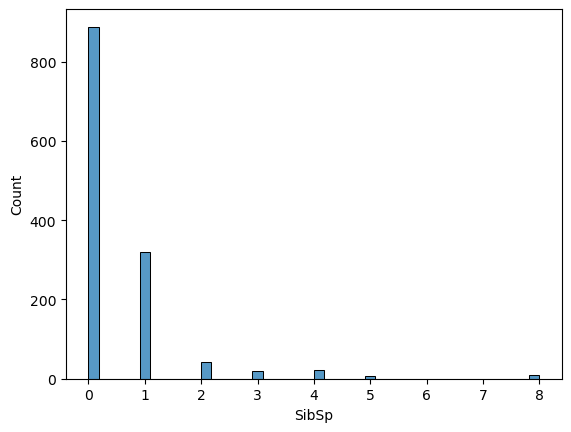

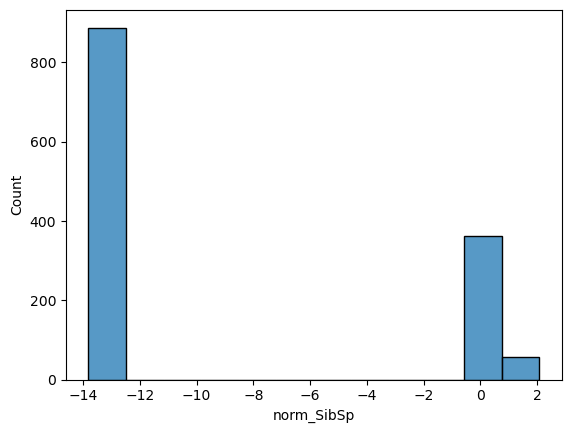

In [387]:
sns.histplot(train.SibSp)
plt.show()
sns.histplot(train.norm_SibSp)
plt.show()

In [388]:
train.drop(["norm_SibSp","norm_Parch","Fare"],axis=1, inplace= True)

In [389]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [390]:
y = y.astype("int32")

Encode Categorical Data 

In [391]:
X.multiple_cabin = X.multiple_cabin.astype("object")
categorical = [col for col in X.columns if X[col].dtype == "object"]
X[categorical] = X[categorical].astype(str)
X = pd.get_dummies(X, columns=categorical)

In [392]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1306 non-null   float64
 1   SibSp                    1306 non-null   int64  
 2   Parch                    1306 non-null   int64  
 3   norm_Fare                1306 non-null   float64
 4   Pclass_1                 1306 non-null   uint8  
 5   Pclass_2                 1306 non-null   uint8  
 6   Pclass_3                 1306 non-null   uint8  
 7   Sex_female               1306 non-null   uint8  
 8   Sex_male                 1306 non-null   uint8  
 9   Embarked_C               1306 non-null   uint8  
 10  Embarked_Q               1306 non-null   uint8  
 11  Embarked_S               1306 non-null   uint8  
 12  multiple_cabin_0         1306 non-null   uint8  
 13  multiple_cabin_1         1306 non-null   uint8  
 14  multiple_cabin_2         

Scale The  Data

In [393]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Model Building and check accurecy using Cross Validation 


In [394]:
model = LogisticRegression()
CV  = cross_val_score(model, X_scaled,y,cv= 5)
print(CV)
print(CV.mean())

[0.80916031 0.81992337 0.78544061 0.90421456 0.94252874]
0.8522535170073997


In [395]:
model = LinearSVC(max_iter=10000)
CV  = cross_val_score(model, X_scaled,y,cv= 5)
print(CV)
print(CV.mean())

c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.80152672 0.80842912 0.77394636 0.91570881 0.95402299]
0.8507267994501475


c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [396]:
model = SVC(kernel="rbf")
CV  = cross_val_score(model, X_scaled,y,cv= 5)
print(CV)
print(CV.mean())

[0.79389313 0.79310345 0.75862069 0.90421456 0.93103448]
0.8361732619695241


Thanks ✨😊 